<a href="https://colab.research.google.com/github/joshdsolis/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop('price', axis=1)
y = df.price

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [9]:
print("Coefficient: \n",model.coef_)
print("\n Intercept: ",model.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

 Intercept:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [11]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = np.sqrt(MSE)
print('RMSE is {}'.format(RMSE))


R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient is 1098.2829. The coefficient suggests it is highly correlated with the y value, or the price feature.

## 1.8 How should we interpret the Root-Mean-Square Error?

The large RMSE of 22479.105 would suggest that our regression line has a lot of data points that lie far away from it.

## 1.9 How should we interpret the $R^2$?

The low R^2 suggests that the linear regression does not fit the data very well. The y variable is not being explained by the data in the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

df['price_ln'] = np.log(df['price'])

(8495, 9)


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

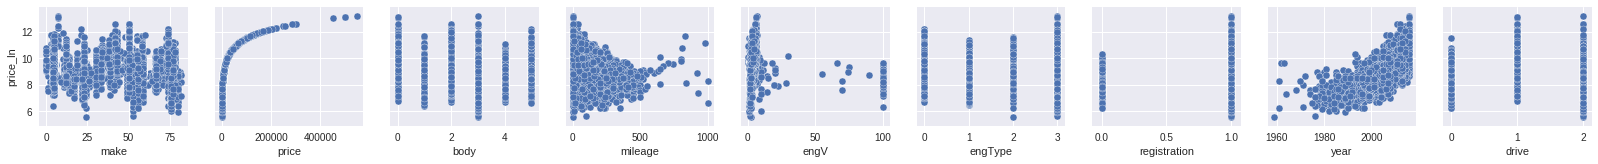

In [14]:
# Generate a list of column headers not including price
x_columns = df.columns.drop('price_ln')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price_ln'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
df['yearSq'] = df['year']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
y = df.price_ln
X = df.drop(['price','price_ln'], axis=1)


In [19]:
# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# Fitting regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,Y_train)

# Printing coefficient and intercept
print("Coefficient: \n",model.coef_)
print("\nIntercept: ",model.intercept_)

# Prediction
y_test_predict = model.predict(X_test)

# RMSE and R^2
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = np.sqrt(MSE)
print('RMSE is {}'.format(RMSE))


R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

Coefficient: 
 [-1.61546879e-03 -8.56238008e-02  6.80416242e-04  9.64573698e-03
 -4.93594088e-02  6.70762698e-01 -6.19087737e+00  3.82779837e-01
  1.57155448e-03]

Intercept:  6103.332821261489
RMSE is 0.5553444740504578
R^2 is 0.6724141552317907


In [21]:
X.head()

,make,body,mileage,engV,engType,registration,year,drive,yearSq
0,23,0,68,2.5,1,1,2010,1,4040100
1,50,3,173,1.8,1,1,2011,2,4044121
2,50,2,135,5.5,3,1,2008,2,4032064
3,50,5,162,1.8,0,1,2012,0,4048144
4,55,0,83,2.0,3,1,2013,1,4052169


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient is a lot smaller, by several powers of 10 in fact. This is probably due to including a column of the year squared.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Seeks to minimize slope.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate is 𝛼 in the equation for gradient descent. It represents how big the steps that are initially taken are.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [25]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:29:44   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [26]:
##### Your Code Here #####
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'yearSq'],
      dtype='object') 


[2953273039.000897, 1.060431475161977, 1.1583527741914774, 1.9368892032947695, 1.0100376419582973, 1.1547598212322845, 1.1085146982201888, 141693.16571434424, 1.1396338223459779, 141937.91485709895]


The large VIF values for year and year squared suggest we have multicollinearity problems.